In [18]:
#ERP Investment strategy
import yfinance as yf
import pandas as pd
import numpy as np


In [19]:
# Load CSV data into a DataFrame
file_path = 'stock_data.CSV'
result_df = pd.read_csv(file_path)
result_df = result_df.dropna()
# Display the DataFrame
result_df


,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,priceToBook,pitroski,freeCashFlow5Yrs,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield
0,1,ABB.NS,117519.84,1791.47,1671.55,1242.05,1168.40,1351.48,-3352.17,11001.19,...,20.57,9,3026.72,0.015244,0.014224,0.009942,3.698647e-03,23.854635,0.294763,0.025755
1,2,ADANIENSOL.NS,152720.26,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,10.03,5,2879.90,0.039950,0.029690,-0.006058,4.270984e-04,-0.025679,0.039037,0.018857
2,3,ADANIENT.NS,418133.02,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,10.03,8,-5401.60,0.023946,0.024928,0.007107,8.748520e-04,0.052002,0.010773,-0.012918
3,4,ADANIGREEN.NS,359870.71,5870.00,7263.00,1457.00,3927.00,7265.00,-3857.00,71479.00,...,38.52,6,-15004.69,0.016311,0.020182,0.010912,4.790532e-04,0.068441,-0.027295,-0.041695
4,5,ADANIPORTS.NS,330690.37,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,5.88,5,21980.62,0.037764,0.038395,0.009109,1.099910e-03,0.060173,0.107215,0.066469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,UPL.NS,67967.81,10809.00,3118.00,-718.00,5462.00,7751.00,-1354.00,91455.00,...,1.25,7,22147.00,0.159031,0.045875,0.080362,-2.637803e-04,0.156343,-0.077798,0.325845
96,97,VBL.NS,189914.43,3688.37,3007.46,2101.81,-803.14,2390.78,-3289.87,15187.18,...,26.66,7,703.86,0.019421,0.015836,-0.004229,1.014241e-03,-0.147872,0.197594,0.003706
97,98,VEDL.NS,175912.18,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,3.33,5,87899.00,0.211935,0.158113,0.110345,7.003080e-04,0.258593,-0.124006,0.499675
98,99,WIPRO.NS,277476.27,19113.60,16087.60,11347.40,11631.30,13060.10,-8169.20,108179.80,...,3.88,5,51031.00,0.068884,0.057978,0.041918,1.755059e-03,0.649159,0.059683,0.183911


In [20]:
# Define whether higher or lower values are better for each ratio
higher_is_better = {
    'roic': True,
    'priceToBook': False,
    'earningsYield': True,
}

# Calculate percentiles for each ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

In [21]:
# Calculate Composite Score
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank'] = result_df['Composite Score'].rank(ascending=False).astype(int)

# Display results in ascending order of rank
result_df_sorted = result_df.sort_values(by='Rank')
result_df_sorted.reset_index(drop=True, inplace=True)
result_df_sorted

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,roic Percentile,priceToBook Percentile,earningsYield Percentile,Composite Score,Rank
0,67,ONGC.NS,447751.17,83634.72,83274.12,50386.21,47757.73,84211.33,-72798.97,669081.99,...,0.106661,3.606454e-03,0.332815,0.058250,0.385248,83.0,98.0,98.0,93.000000,1
1,17,BAJAJHLDNG.NS,95106.39,5052.31,6135.60,6001.89,1725.76,1727.65,-136.84,61581.37,...,0.018146,1.563155e-01,22.113788,0.071630,0.064649,100.0,87.0,74.0,87.000000,2
2,98,VEDL.NS,175912.18,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,0.110345,7.003080e-04,0.258593,-0.124006,0.499675,75.0,74.0,96.0,81.666667,3
3,27,COALINDIA.NS,251857.92,43332.26,40361.80,29376.21,20479.44,35686.21,-23422.99,218135.54,...,0.081313,2.509987e-03,3.243980,0.078451,0.230581,80.0,67.0,97.0,81.333333,4
4,36,GRASIM.NS,265744.79,25331.49,21693.25,9559.50,-24609.81,-12685.14,-13712.13,371569.19,...,-0.092607,1.390412e-02,-0.201839,0.096770,-0.032293,50.0,90.0,90.0,76.666667,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,DLF.NS,227759.46,2030.50,2089.65,2373.31,2320.99,2375.26,-460.61,56057.63,...,0.010191,4.714576e-04,0.699804,0.008182,0.036117,12.0,54.0,5.0,23.666667,96
96,40,HDFCLIFE.NS,133637.32,1517.25,1052.21,1524.43,6797.26,6883.17,-10071.32,288148.36,...,0.050863,3.638348e-04,7.155011,0.016355,0.295595,25.0,31.0,3.0,19.666667,97
97,100,ZOMATO.NS,140506.54,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,-0.006729,-1.554000e-07,-1.814587,0.001574,0.000000,2.0,44.0,1.0,15.666667,98
98,92,TRENT.NS,145183.62,1313.59,1446.72,810.32,371.39,594.88,-102.63,8939.48,...,0.002558,1.172104e-03,0.076744,0.035580,0.003347,31.0,3.0,6.0,13.333333,99


In [22]:
# Select top 20% based on rank
top_50_percent = result_df_sorted.head(int(len(result_df_sorted) * 0.2))
top_50 = top_50_percent['Name']
top_50

0           ONGC.NS
1     BAJAJHLDNG.NS
2           VEDL.NS
3      COALINDIA.NS
4         GRASIM.NS
5     SHRIRAMFIN.NS
6        DRREDDY.NS
7            M&M.NS
8     MUTHOOTFIN.NS
9     HEROMOTOCO.NS
10      HINDALCO.NS
11           IOC.NS
12          GAIL.NS
13    TATAMTRDVR.NS
14          BPCL.NS
15    JINDALSTEL.NS
16     EICHERMOT.NS
17     POWERGRID.NS
18        INDIGO.NS
19        MARUTI.NS
Name: Name, dtype: object

In [24]:
#Backtesting & Optimization

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from datetime import datetime, timedelta

def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def preprocess_data(data):
    data["Return_6months"] = (data["Adj Close"] / data["Adj Close"].shift(126) - 1) * 100
    data["Return_3months"] = (data["Adj Close"] / data["Adj Close"].shift(63) - 1) * 100
    data["Return_1month"] = (data["Adj Close"] / data["Adj Close"].shift(21) - 1) * 100
    data["Return_1week"] = (data["Adj Close"] / data["Adj Close"].shift(5) - 1) * 100
    data["Return_1day"] = (data["Adj Close"] / data["Adj Close"].shift(1) - 1) * 100

    

    return data

nifty50_data = {}
start_date = "2022-01-01"
end_date = "2024-01-01"

# Fetch Nifty50 data
for symbol in top_50:
    nifty50_data[symbol] = fetch_stock_data(symbol, start_date, end_date)

# trade data storage
trade_data = []

# Iterate over the stocks
for symbol, stock_data in nifty50_data.items():
    processed_data = preprocess_data(stock_data)

    # Check if there are enough data points
    if len(processed_data) < 2:
        print(f"Not enough data for {symbol}. Skipping...")
        continue

    # Buy shares on the start date
    initial_capital = 100000
    shares_bought = int(initial_capital / processed_data["Close"].iloc[0])
    trade_data.append({"Symbol": symbol, "Action": "Buy", "Buy Date": processed_data.index[0], "Price": processed_data["Close"].iloc[0], "Shares": shares_bought, "Capital": initial_capital, "Profit/Loss": 0, "Sell Date": None, "Days in Trade": 0})

    # Sell shares on the end date
    capital = shares_bought * processed_data["Close"].iloc[-1]
    profit_loss = capital - initial_capital
    trade_data[-1]["Sell Date"] = processed_data.index[-1]
    trade_data[-1]["Days in Trade"] = len(pd.bdate_range(trade_data[-1]["Buy Date"], trade_data[-1]["Sell Date"]))
    trade_data.append({"Symbol": symbol, "Action": "Sell", "Buy Date": None, "Sell Date": processed_data.index[-1], "Days in Trade": 0, "Price": processed_data["Close"].iloc[-1], "Shares": shares_bought, "Capital": capital, "Profit/Loss": profit_loss})


trade_df = pd.DataFrame(trade_data)
trade_df.to_csv("QVM_.csv", index=False)

# Calculate total initial capital and total final capital
total_initial_capital = trade_df[trade_df["Action"] == "Buy"]["Capital"].sum()
total_final_capital = total_initial_capital + trade_df[trade_df["Action"] == "Sell"]["Profit/Loss"].sum()

# Display the final capital, percentage return, and in-trade days for each stock
for symbol in nifty50_data.keys():
    final_capital = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Capital"].iloc[0]
    percentage_return = (final_capital - initial_capital) / initial_capital * 100
    in_trade_days = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Days in Trade"].iloc[0]
    print(f"Symbol: {symbol}, Final Capital: {final_capital:.2f}, Percentage Return: {percentage_return:.2f}%, In-Trade Days: {in_trade_days}")

# Define the symbol for Nifty50
nifty50_symbol = "^NSEI"

# Download Nifty50 historical data
nifty50_data = yf.download(nifty50_symbol, start=start_date, end=end_date)

# Calculate total return
start_value = nifty50_data["Adj Close"].iloc[0]
end_value = nifty50_data["Adj Close"].iloc[-1]
total_return = ((end_value / start_value) - 1) * 100

# Display the total percentage return across all stocks
total_percentage_return = (total_final_capital - total_initial_capital) / total_initial_capital * 100
print(f"Total Initial Capital: {total_initial_capital:.2f}")
print(f"Total Final Capital Across All Stocks: {total_final_capital:.2f}")
print(f"Total Percentage Return Across All Stocks: {total_percentage_return:.2f}%")
# Display the total return of Nifty50
print(f"Total Return of Nifty50: {total_return:.2f}%")

# trade data storage
y_trade_data = []
nifty_stocks = ["^NSEI"]    
# Iterate over the years
years = range(int(start_date[:4]), int(end_date[:4]))
for year in years:
    # Fetch stock data for each stock
    stock_data_dict = {}
    for symbol in top_50:
        stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    #yearly returns
    yearly_returns = {}

    # Iterate over the stocks
    y_total_portfolio_value = 0
    y_total_initial_capital = 0
    for symbol, stock_data in stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        y_initial_capital = 100000
        y_shares_bought = int(y_initial_capital / stock_data["Close"].iloc[0])
        y_capital = y_shares_bought * stock_data["Close"].iloc[-1]
        y_total_portfolio_value += y_capital
        y_total_initial_capital += y_initial_capital
   
    # Fetch stock data for each stock
    n_stock_data_dict = {}

    for symbol in nifty_stocks:
        n_stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    # nifty yearly returns
    n_yearly_returns = {}

    # Iterate over the stocks
    n_total_portfolio_value = 0
    n_total_initial_capital = 0
    for symbol, stock_data in n_stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        n_initial_capital = 100000
        n_shares_bought = int(n_initial_capital / stock_data["Close"].iloc[0])
        n_capital = n_shares_bought * stock_data["Close"].iloc[-1]
        n_total_portfolio_value += n_capital
        n_total_initial_capital += n_initial_capital

    # Append year and yearly return for the portfolio
    yearly_returns["Year"] = year
    yearly_returns["Nifty_50"] = ((n_total_portfolio_value - n_total_initial_capital) / n_total_initial_capital) * 100
    yearly_returns["Portfolio"] = ((y_total_portfolio_value - y_total_initial_capital) / y_total_initial_capital) * 100

    # Append yearly returns to trade data
    y_trade_data.append(yearly_returns)


y_trade_df = pd.DataFrame(y_trade_data)


# Calculate CAGR (Compound Annual Growth Rate)
start_year = int(start_date[:4])
end_year = int(end_date[:4])
years = end_year - start_year

# CAGR formula: ((final value / beginning value) ^ (1 / no of years)) - 1
cagr = ((total_final_capital / total_initial_capital) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Portfolio): {cagr:.2%}")

# Calculate and print Nifty CAGR
nifty_cagr = ((end_value / start_value) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Nifty): {nifty_cagr:.2%}")

#Portfolio optimization
#Define the stock tickers and historical data
stock_tickers = top_50
start_year = int(start_date[:4])
end_year = int(end_date[:4])

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

#Function to calculate portfolio returns for a given year
def calculate_portfolio_metrics(weights, year):
    #Fetch historical data for each stock
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    #Calculate portfolio returns
    portfolio_returns = (stock_data.pct_change() * weights).sum(axis=1).dropna()

    #Calculate portfolio cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    #Calculate total return for the year
    total_return = cumulative_returns.iloc[-1] - 1

    return total_return, weights  #Return the total return and weights for the year

#Initialize empty dictionary to store annual returns and weights
annual_returns_and_weights = {}

#Loop through each year
for year in range(start_year, end_year):
    #Fetch historical stock data
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    #Calculate expected returns and sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(stock_data)
    cov_matrix = risk_models.sample_cov(stock_data)

    #Optimize for maximum Sharpe ratio
    ef = EfficientFrontier(mu, cov_matrix)
    weights = ef.max_sharpe(risk_free_rate= 0.06)  #Assuming a risk-free rate of -3%

    #Calculate portfolio metrics for the year using the optimal weights
    annual_returns_and_weights[year] = calculate_portfolio_metrics(weights, year)

#Print annual returns and weights
for year, (return_value, weights) in annual_returns_and_weights.items():
    print(f"Year: {year}")
    print(f"Return: {return_value:.2%}")
    print("Weights:")
    for ticker, weight in weights.items():
        print(f"{ticker}: {weight:.2%}")
    print()

#Display trade data
print(trade_df)
print(y_trade_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [25]:
#Passive portfolio

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import pandas as pd
import yfinance as yf
import numpy as np

# Define the stock tickers and historical data
stock_tickers = top_50
start_year = int(start_date[:4])
end_year = int(end_date[:4])

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data for the first year
first_year_stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{start_year}-01-01", f"{start_year+1}-01-01") for ticker in stock_tickers})

# Calculate expected returns and sample covariance matrix of asset returns for the first year
mu = expected_returns.mean_historical_return(first_year_stock_data)
cov_matrix = risk_models.sample_cov(first_year_stock_data)

# Optimize for maximum Sharpe ratio for the first year
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe(risk_free_rate=-0.5)  # Assuming a risk-free rate of -0.5% for demonstration

# Initialize empty dictionary to store annual returns
annual_returns = {}

# Loop through each year
for year in range(start_year, end_year):
    # Fetch historical stock data for the year
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    # Calculate portfolio returns for the year using the optimized weights
    portfolio_returns = (stock_data.pct_change() * weights).sum(axis=1).dropna()

    # Calculate portfolio cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    # Calculate total return for the year
    total_return = cumulative_returns.iloc[-1] - 1

    # Store the total return for the year
    annual_returns[year] = total_return

# Print weights of the stocks
print("Weights of the stocks in the portfolio:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")

# Print annual returns with the same weights for each year
print("\nAnnual Returns:")
for year, return_value in annual_returns.items():
    print(f"Year: {year}, Return: {return_value:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [26]:
#Weightage for next year and returns for the year

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import yfinance as yf

# Define the stock tickers and historical data range
stock_tickers = top_50
ystart_date = "2020-01-01"
yend_date = "2022-12-31"

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, ystart_date, yend_date):
    return yf.download(stock_ticker, start=ystart_date, end=yend_date)['Adj Close']

# Initialize empty dictionary to store historical stock data
stock_data = {}

# Fetch historical stock data for each stock
for ticker in stock_tickers:
    stock_data[ticker] = fetch_historical_data(ticker, ystart_date, yend_date)

# Combine stock data into a single DataFrame
all_stock_data = pd.DataFrame(stock_data)

# Calculate expected returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(all_stock_data)
cov_matrix = risk_models.sample_cov(all_stock_data)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe()

# Print optimal weights for next year 
print("Optimal Weights for next year:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")

# Determine start date and end date for next year
next_year_start_date = pd.Timestamp(yend_date) + pd.DateOffset(days=1)
next_year_end_date = pd.Timestamp(yend_date) + pd.DateOffset(years=1)

# Fetch historical stock data for next year if available
next_year_stock_data = {}
for ticker in stock_tickers:
    next_year_stock_data[ticker] = fetch_historical_data(ticker, next_year_start_date, next_year_end_date)

# Check if data for next year exists
if all(data.empty for data in next_year_stock_data.values()):
    print("No historical data available for next year.")
else:
    # Combine next year stock data into a single DataFrame
    all_next_year_stock_data = pd.DataFrame(next_year_stock_data)
    
    # Calculate portfolio returns for next year using optimal weights
    portfolio_returns = (all_next_year_stock_data.pct_change() * weights).sum(axis=1).dropna()
    # Calculate total portfolio returns for next year
    total_portfolio_return_next_year = portfolio_returns.sum()

    # Print total portfolio returns for next year
    print("Total Portfolio Returns of the next year so far:", total_portfolio_return_next_year)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [27]:
#weightage of stocks for next month and returns for the month

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import yfinance as yf

# Define the stock tickers and historical data
stock_tickers = top_50
mstart_date = "2023-02-01"
mend_date = "2024-01-31" 

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, mstart_date, mend_date):
    return yf.download(stock_ticker, start=mstart_date, end=mend_date)['Adj Close']

# Fetch historical stock data up to the end month
stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, mstart_date, mend_date) for ticker in stock_tickers})

# Calculate expected returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(stock_data)
cov_matrix = risk_models.sample_cov(stock_data)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe(risk_free_rate= 0.06)

# Print the optimal weights for the following month after the end date
print("Optimal Weights for the Following Month after the End Date:", pd.Timestamp(end_date).to_period('M').asfreq('M').to_timestamp().strftime("%Y-%m"))
print("Weights:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")


# Determine the start and end dates for the next month
next_month_start_date = pd.Timestamp(end_date) + pd.offsets.MonthBegin(1)
next_month_end_date = pd.Timestamp(next_month_start_date) + pd.offsets.MonthEnd(0)

# Fetch historical stock data for the next month if available
try:
    next_month_stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, next_month_start_date, next_month_end_date) for ticker in stock_tickers})

    # Calculate portfolio returns for the next month using optimal weights
    portfolio_returns_next_month = (next_month_stock_data.pct_change() * weights).sum(axis=1).dropna()

    # Calculate total portfolio returns for the next month
    total_portfolio_return_next_month = portfolio_returns_next_month.sum()

    # Print total portfolio returns for the next month
    print("Total Portfolio Returns for the Next Month:", total_portfolio_return_next_month)

except Exception as e:
    # Display optimal weights if stock data is not available for the next month
    print("Stock data for the next month is not available. Displaying optimal weights instead:")
    print("Optimal Weights for the Following Month after the End Date:", pd.Timestamp(end_date).to_period('M').asfreq('M').to_timestamp().strftime("%Y-%m"))
    print("Weights:")
    for ticker, weight in weights.items():
        print(f"{ticker}: {weight:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

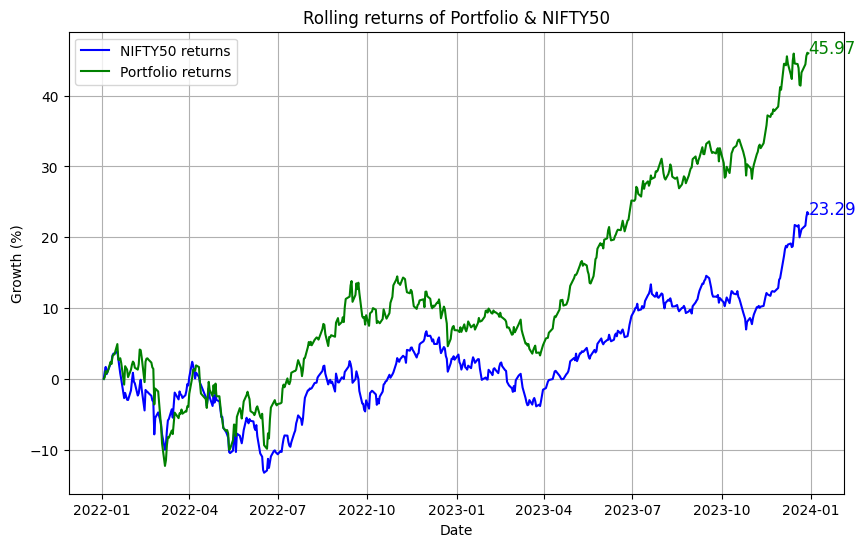

In [28]:
#Visualization
#Benchmarking the portfolio rolling returns with NIFTY50 Index
import matplotlib.pyplot as plt

# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data up to the end month
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate cumulative growth for Nifty50
nifty_growth = (nifty_data / nifty_data.iloc[0] - 1) * 100

# Calculate cumulative growth for the portfolio (equal-weighted)
portfolio_growth = (portfolio_data.mean(axis=1) / portfolio_data.mean(axis=1).iloc[0] - 1) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nifty_growth, label='NIFTY50 returns', color='blue')
plt.plot(portfolio_growth, label='Portfolio returns', color='green')
plt.title('Rolling returns of Portfolio & NIFTY50')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
# Annotate the final value of each line
plt.text(nifty_growth.index[-1], nifty_growth.iloc[-1], f'{nifty_growth.iloc[-1]:.2f}', color='blue', fontsize=12, ha='left')
plt.text(portfolio_growth.index[-1], portfolio_growth.iloc[-1], f'{portfolio_growth.iloc[-1]:.2f}', color='green', fontsize=12, ha='left')

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

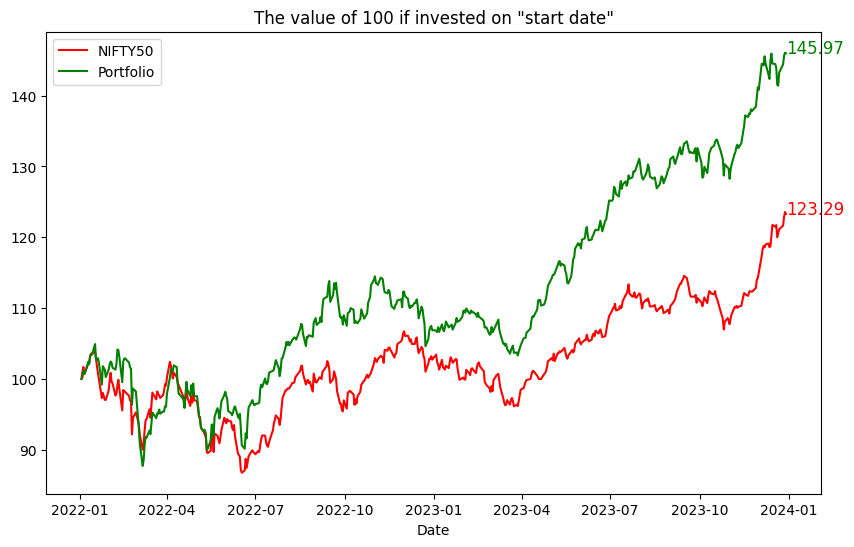

In [29]:
#Visualizing the value of 100 if invested on the start the date
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data up to the end month
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate cumulative growth for NIFTY
nifty_growth = (nifty_data / nifty_data.iloc[0]) * 100

# Calculate cumulative growth for the portfolio (equal-weighted)
portfolio_growth = (portfolio_data.mean(axis=1) / portfolio_data.mean(axis=1).iloc[0]) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nifty_growth, label='NIFTY50', color='red')
plt.plot(portfolio_growth, label='Portfolio', color='green')
plt.title('The value of 100 if invested on "start date"')
plt.xlabel('Date')
plt.legend()
plt.grid(False)


# Annotate the final value of each line
plt.text(nifty_growth.index[-1], nifty_growth.iloc[-1], f'{nifty_growth.iloc[-1]:.2f}', color='red', fontsize=12, ha='left')
plt.text(portfolio_growth.index[-1], portfolio_growth.iloc[-1], f'{portfolio_growth.iloc[-1]:.2f}', color='green', fontsize=12, ha='left')

plt.show()

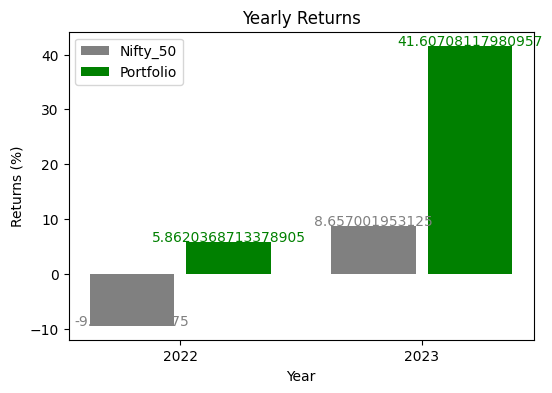

In [30]:
#Visual comparision of yearly returns between portfolio & NIFTY50
# Plotting
plt.figure(figsize=(6, 4))

# Plot Nifty_50 returns
plt.bar(y_trade_df['Year'] - 0.2, y_trade_df['Nifty_50'], width=0.35, label='Nifty_50', color='grey')

# Plot Portfolio returns
plt.bar(y_trade_df['Year'] + 0.2, y_trade_df['Portfolio'], width=0.35, label='Portfolio', color='green')

plt.title('Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns (%)')
plt.xticks(y_trade_df['Year'])
plt.legend()
#plt.grid(axis='y')

# Annotate each bar with its corresponding value
for index, row in y_trade_df.iterrows():
    plt.text(row['Year'] - 0.2, row['Nifty_50'] + 0.1, str(row['Nifty_50']), color='grey', ha='center')
    plt.text(row['Year'] + 0.2, row['Portfolio'] + 0.1, str(row['Portfolio']), color='green', ha='center')

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

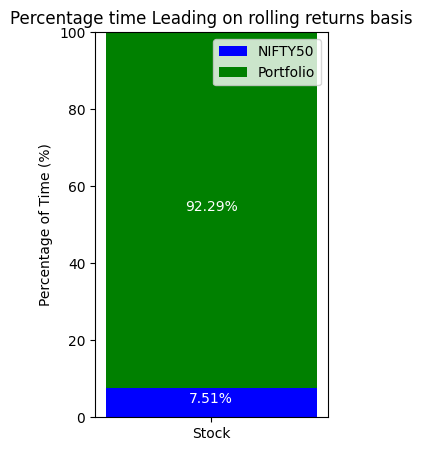

In [31]:
#Visual representation of Percentage Time Leading on 1-year Rolling Basis
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data up to the end month
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate cumulative returns
nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod() - 1
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod() - 1

# Compare cumulative returns and count occurrences
nifty_outperforms = (nifty_cumulative_returns > portfolio_cumulative_returns).sum()
portfolio_outperforms = (nifty_cumulative_returns < portfolio_cumulative_returns).sum()
total_days = len(nifty_cumulative_returns)

# Calculate the percentage of time each outperforms the other
nifty_outperforms_percentage = nifty_outperforms / total_days * 100
portfolio_outperforms_percentage = portfolio_outperforms / total_days * 100

# Plotting
plt.figure(figsize=(3, 5))

# Plot a single stacked bar chart with reduced width
plt.bar(['Stock'], nifty_outperforms_percentage, width=0.2, color='blue', label='NIFTY50')
plt.bar(['Stock'], portfolio_outperforms_percentage, bottom=nifty_outperforms_percentage, width=0.2, color='green', label='Portfolio')

plt.title('Percentage time Leading on rolling returns basis')
#plt.xlabel('Comparison')
plt.ylabel('Percentage of Time (%)')
plt.legend()

plt.text('Stock', nifty_outperforms_percentage / 2, f'{nifty_outperforms_percentage:.2f}%', color='white', ha='center')
plt.text('Stock', nifty_outperforms_percentage + portfolio_outperforms_percentage / 2, f'{portfolio_outperforms_percentage:.2f}%', color='white', ha='center')

plt.ylim(0, 100)

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

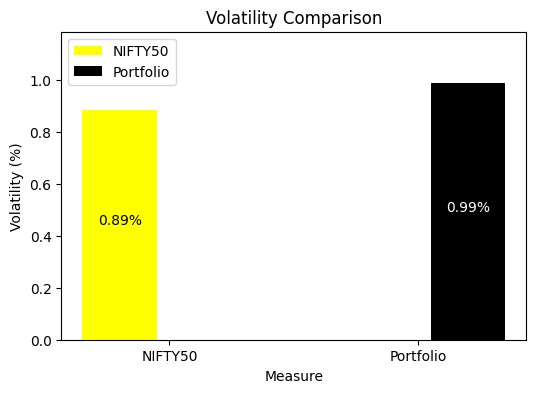

In [32]:
#Visual representation of volatility comparision between portfolio & NIFTY50
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data up to the end month
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate volatility (standard deviation) for NIFTY50
nifty_volatility = nifty_daily_returns.std() * 100  # Converting to percentage

# Calculate portfolio volatility (standard deviation)
portfolio_volatility = portfolio_daily_returns.std() * 100  # Converting to percentage

# Plotting
plt.figure(figsize=(6, 4))

# Define the x-axis positions for the bars
x = np.arange(1.5)

# Plot the volatilities in a bar graph with reduced width
plt.bar(x - 0.2, [nifty_volatility, 0], width=0.3, color='yellow', label='NIFTY50')
plt.bar(x + 0.2, [0, portfolio_volatility], width=0.3, color='black', label='Portfolio')

plt.title('Volatility Comparison')
plt.xlabel('Measure')
plt.ylabel('Volatility (%)')
plt.xticks(x, ['NIFTY50', 'Portfolio'])
plt.legend()

# Annotate the bars with the volatility values
plt.text(x[0] - 0.2, nifty_volatility / 2, f'{nifty_volatility:.2f}%', color='black', ha='center')
plt.text(x[1] + 0.2, portfolio_volatility / 2, f'{portfolio_volatility:.2f}%', color='white', ha='center')

plt.ylim(0, max(nifty_volatility, portfolio_volatility) * 1.2)  # Set y-axis limit to accommodate the bars

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

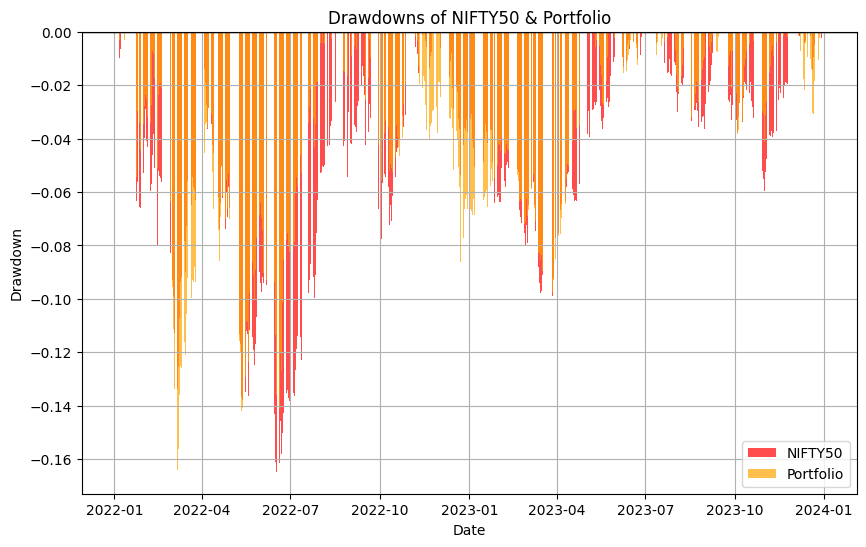

In [33]:
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data up to the end month
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate the daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate the cumulative product of the NVIDIA returns
nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod()

# Calculate the cumulative product of the portfolio returns
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Calculate the cumulative maximum of the NVIDIA returns
nifty_cumulative_max = nifty_cumulative_returns.cummax()

# Calculate the cumulative maximum of the portfolio returns
portfolio_cumulative_max = portfolio_cumulative_returns.cummax()

# Calculate the drawdown as the ratio of the returns to the cumulative maximum
nifty_drawdown = (nifty_cumulative_returns - nifty_cumulative_max) / nifty_cumulative_max
portfolio_drawdown = (portfolio_cumulative_returns - portfolio_cumulative_max) / portfolio_cumulative_max

# Print maximum drawdown values
print("Maximum Drawdown:")
print(f"NIFTY50: {nifty_drawdown.min() * 100:.2f}%")
print(f"Portfolio: {portfolio_drawdown.min() * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))

# Plot the drawdown for NIFTY
plt.bar(nifty_drawdown.index, nifty_drawdown, color='red', alpha=0.7, label='NIFTY50')

# Plot the drawdown for the portfolio
plt.bar(portfolio_drawdown.index, portfolio_drawdown, color='orange', alpha=0.7, label='Portfolio')

plt.title('Drawdowns of NIFTY50 & Portfolio')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at y=0
plt.legend()
plt.grid(True)

plt.show()
